### Analyzing titanic data
**Best score: 79.665% (2022-04-05)**

**Done w/Soft voting of all estimators post-hyperparameter tuning (LR, KNN, SVC, RF, ADA, NN, KM, XGB)**

1) Exploratory analysis
2) Feature engineering
3) Data preprocessing
4) Initial model building
5) Tuning hyperparameters
6) Ensemble approaches
7) Results

In [1]:
# Working with data
import numpy as np
import pandas as pd
import string

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Modeling
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

# Model tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy import stats

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

c:\Users\chris\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Needed to put "r" before the path to convert it to a raw string since Windows paths contain backslashes, which are escape characters
training = pd.read_csv(r'C:\Users\chris\Desktop\titanic\train.csv')
test = pd.read_csv(r'C:\Users\chris\Desktop\titanic\test.csv')

training.name = 'Training Set'
test.name = 'Test Set' 

dfs = [training, test]

%matplotlib inline

### Exploratory analysis

In [3]:
# Quick look into the training data
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Quick look into the training data
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Quick look into the test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
# Quick look into the test data
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
# Defining a column to show the quantity of NaNs in each column
def display_missing(df):
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




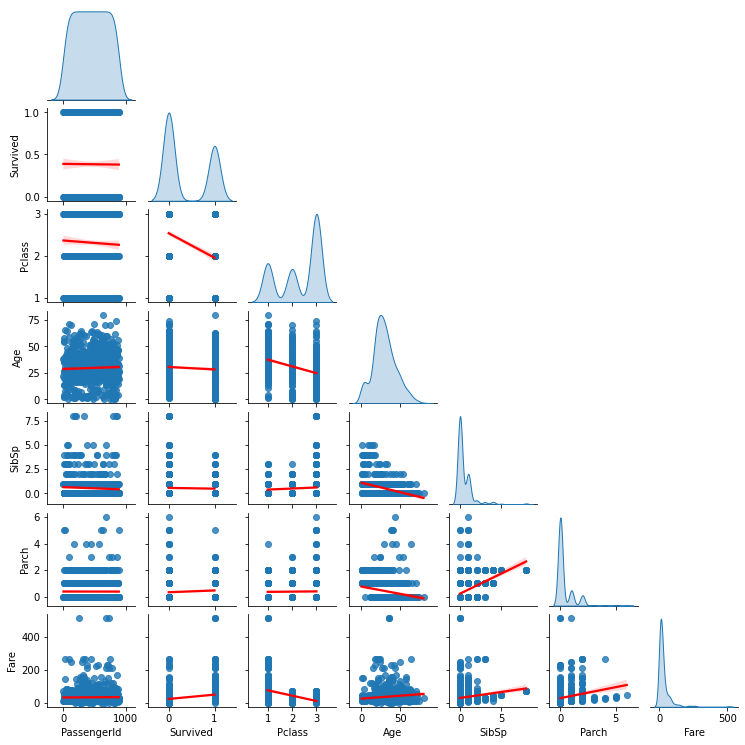

In [8]:
# Generate a pair plot of all variables w/regression line
sns.pairplot(training, diag_kind='kde', height=1.5, corner=True, kind='reg', plot_kws={'line_kws':{'color':'red'}})

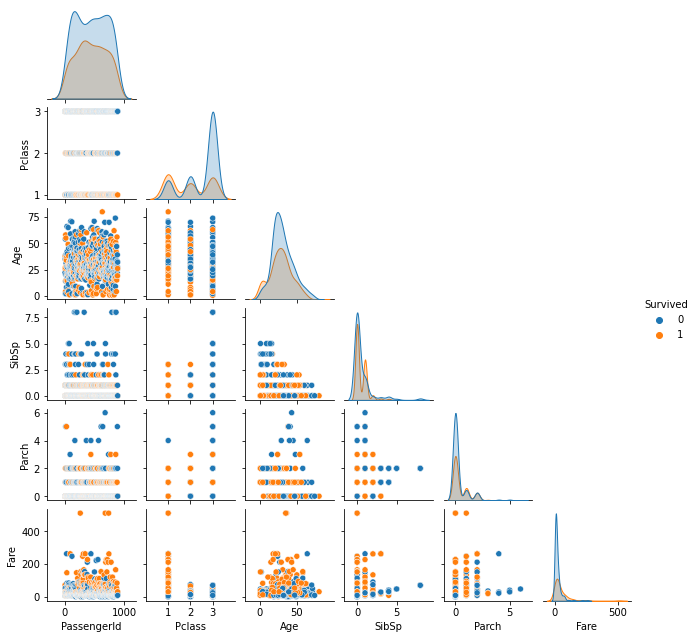

In [9]:
# Generate a pair plot of all variables, colored by survival status
sns.pairplot(training, diag_kind='kde', height=1.5, corner=True, hue='Survived')

In [10]:
# Breaking training into numerics & categoricals
df_num = [cname for cname in training.columns if training[cname].dtype in ['int64', 'float64']]
df_cat = [cname for cname in training.columns if training[cname].dtype == 'object']

df_num = training[df_num]
df_cat = training[df_cat]

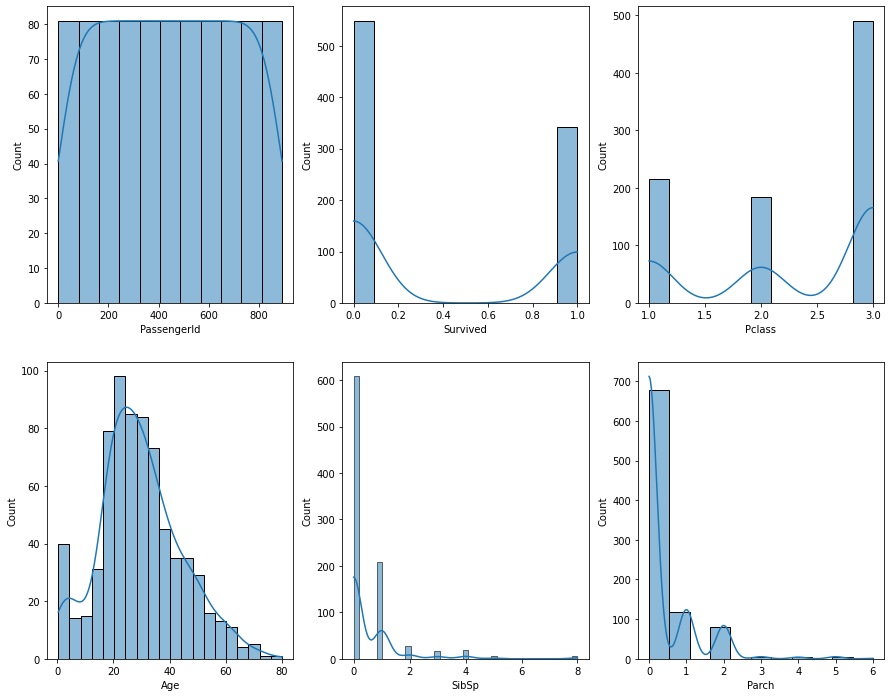

In [11]:
# Checking the distribution of numerical columns
fig, axes = plt.subplots(2, 3, figsize=(15, 12))

for i, ax in zip(df_num.columns, axes.ravel()):
    sns.histplot(df_num[i], kde=True, ax=ax)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<AxesSubplot:>

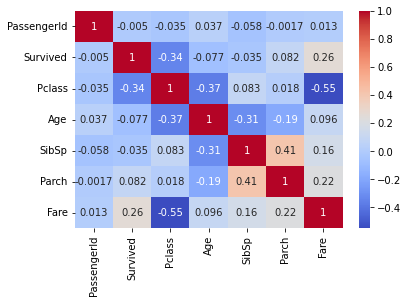

In [12]:
# Correlations of numericals
print(df_num.corr())
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')

In [13]:
# Breakdown of survival status by fare, siblings, parents, & fare
pd.pivot_table(training, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [14]:
# Correlation of everything with age
training_corr = training.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
training_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
training_corr[training_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
5,Age,Age,1.000000
12,Age,Pclass,0.369226
16,Age,SibSp,0.308247
21,Age,Parch,0.189119
26,Age,Fare,0.096067
32,Age,Survived,0.077221
36,Age,PassengerId,0.036847


In [15]:
# Filling the missing values in Age with the median ages grouped by Sex and Pclass
age_by_pclass_sex = training.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print(f'Median age of Pclass {pclass} {sex}s: {age_by_pclass_sex[sex][pclass]}')
print('Median age of all passengers: {}'.format(training['Age'].median()))

training['Age'] = training.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
test['Age'] = training.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [16]:
# Looking at ticket distributions separated by survival status across pclass, sex, and embarkment
print(pd.pivot_table(training, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print('\n', pd.pivot_table(training, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print('\n', pd.pivot_table(training, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

 Sex       female  male
Survived              
0             81   468
1            233   109

 Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [17]:
# Filling the missing values in Embarked with S
# Both passengers are female, upper class, & have the same ticket number, which means that they probably knew each other & embarked from the same location. Googling their names gives us the embarkment locaiton "S"
training['Embarked'] = training['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

In [18]:
# Filling the missing value in Fare with the median Fare of a male 3rd class passenger that was on his own
med_fare = training.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
training['Fare'] = training['Fare'].fillna(med_fare)
test['Fare'] = test['Fare'].fillna(med_fare)

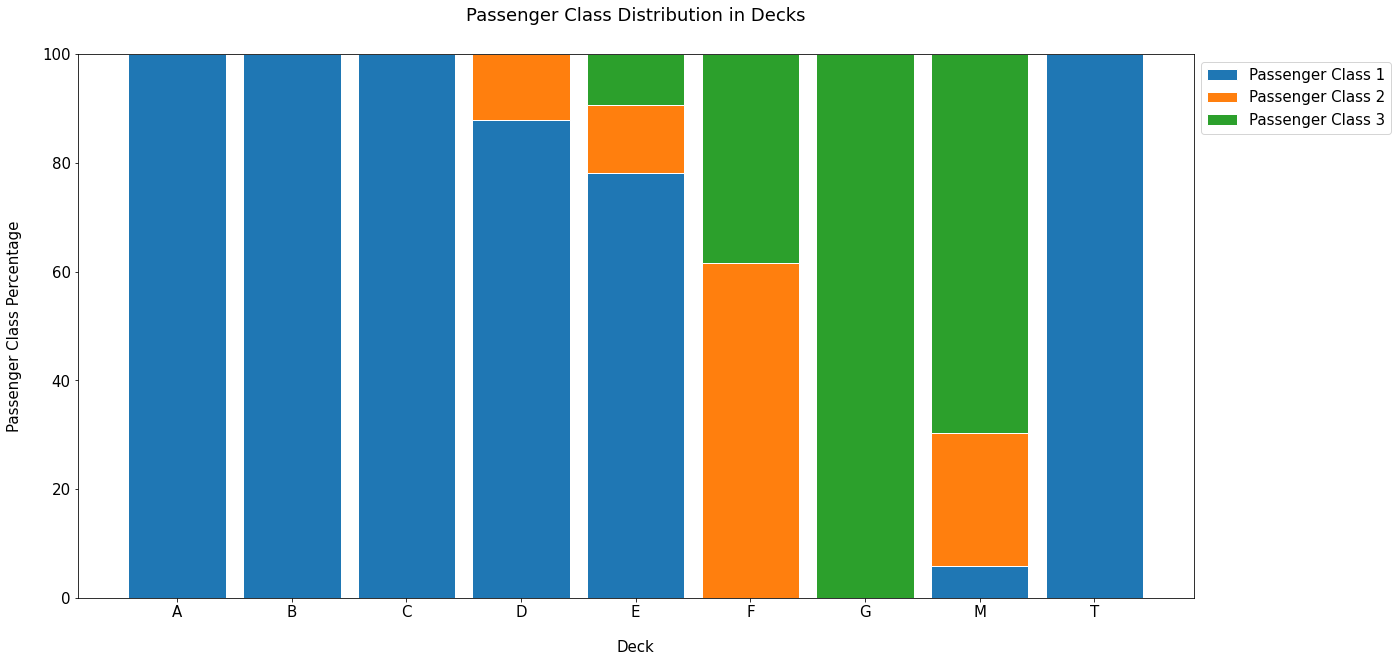

In [19]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
training['Deck'] = training['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'M')
test['Deck'] = test['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'M')

training_decks = training.groupby(['Deck', 'Pclass']).count().drop(columns=[
    'Survived',
    'Sex',
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Embarked',
    'Cabin',
    'PassengerId',
    'Ticket'
    ]).rename(columns={'Name': 'Count'}).transpose()

test_decks = test.groupby(['Deck', 'Pclass']).count().drop(columns=[
    'Sex',
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Embarked',
    'Cabin',
    'PassengerId',
    'Ticket'
    ]).rename(columns={'Name': 'Count'}).transpose()

def get_pclass_dist(df):
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {
        'A': {},
        'B': {},
        'C': {},
        'D': {},
        'E': {},
        'F': {},
        'G': {},
        'M': {},
        'T': {}
        }
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='tab:blue', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='tab:orange', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='tab:green', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

training_deck_count, training_deck_per = get_pclass_dist(training_decks)
display_pclass_dist(training_deck_per)

In [20]:
# Passenger in the T deck is changed to A
idx = training[training['Deck'] == 'T'].index
training.loc[idx, 'Deck'] = 'A'

idx = test[test['Deck'] == 'T'].index
test.loc[idx, 'Deck'] = 'A'

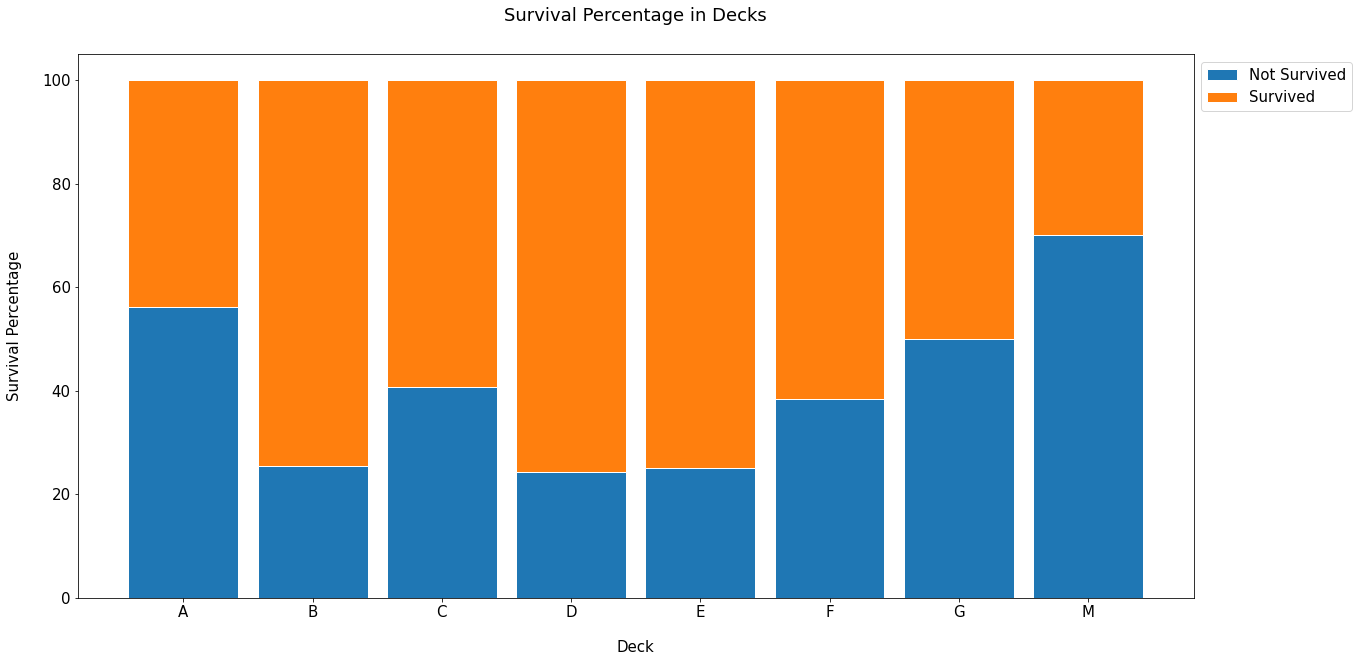

In [21]:
training_decks_survived = training.groupby(['Deck', 'Survived']).count().drop(columns=[
    'Sex',
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Embarked',
    'Pclass',
    'Cabin',
    'PassengerId',
    'Ticket'
    ]).rename(columns={'Name':'Count'}).transpose()

# Creating a dictionary for every survival count in every deck
def get_survived_dist(df):
    surv_counts = {
        'A':{},
        'B':{},
        'C':{},
        'D':{},
        'E':{},
        'F':{},
        'G':{},
        'M':{}
        }
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='tab:blue', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='tab:orange', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

training_surv_count, training_surv_per = get_survived_dist(training_decks_survived)
display_surv_dist(training_surv_per)

In [22]:
# Simplifying decks
training['Deck'] = training['Deck'].replace(['A', 'B', 'C'], 'ABC')
training['Deck'] = training['Deck'].replace(['D', 'E'], 'DE')
training['Deck'] = training['Deck'].replace(['F', 'G'], 'FG')

test['Deck'] = test['Deck'].replace(['A', 'B', 'C'], 'ABC')
test['Deck'] = test['Deck'].replace(['D', 'E'], 'DE')
test['Deck'] = test['Deck'].replace(['F', 'G'], 'FG')

print(training['Deck'].value_counts())

M      687
ABC    122
DE      65
FG      17
Name: Deck, dtype: int64


In [23]:
# Dropping the Cabin feature
training.drop(['Cabin'], inplace=True, axis=1)
test.drop(['Cabin'], inplace=True, axis=1)

for df in dfs:
    display_missing(df)

PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 0
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Embarked column missing values: 0
Deck column missing values: 0


PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 0
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Embarked column missing values: 0
Deck column missing values: 0




342 of 891 passengers survived, which is 38.384% of the training set.
549 of 891 passengers didnt survive, which is 61.616% of the training set.


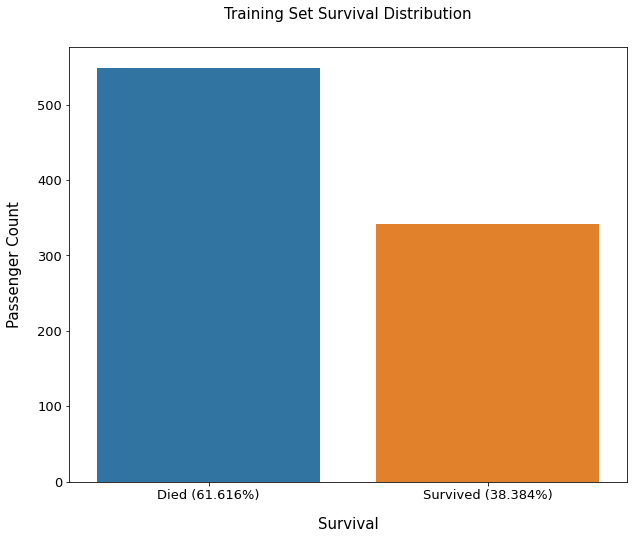

In [24]:
# Plotting proportions of survivors & deaths
survived = training['Survived'].value_counts()[1]
died = training['Survived'].value_counts()[0]
survived_per = survived / training.shape[0] * 100
died_per = died / training.shape[0] * 100

print(f'{survived} of {training.shape[0]} passengers survived, which is {survived_per:.3f}% of the training set.')
print(f'{died} of {training.shape[0]} passengers didnt survive, which is {died_per:.3f}% of the training set.')

plt.figure(figsize=(10, 8))
sns.countplot(training['Survived'])

plt.xlabel('Survival', size=15, labelpad=15)
plt.ylabel('Passenger Count', size=15, labelpad=15)
plt.xticks((0, 1), [f'Died ({died_per:.3f}%)', f'Survived ({survived_per:.3f}%)'])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.title('Training Set Survival Distribution', size=15, y=1.05)

plt.show()

In [25]:
df_train_corr = training.drop(['PassengerId'], axis=1).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()

df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)

df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)

In [26]:
# Columns with high correlations in the training set
corr = df_train_corr_nd['Correlation Coefficient'] > 0.1
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Fare,Pclass,0.549500
8,Parch,SibSp,0.414838
10,Age,Pclass,0.413583
12,Survived,Pclass,0.338481
14,Fare,Survived,0.257307
16,SibSp,Age,0.249854
18,Fare,Parch,0.216225
20,Age,Parch,0.175526
22,SibSp,Fare,0.159651
24,Age,Fare,0.122692


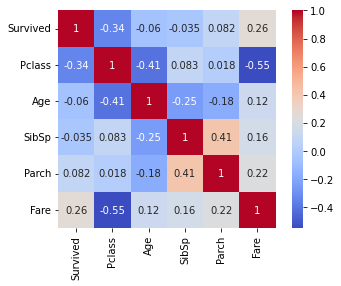

In [27]:
sns.heatmap(training.drop(['PassengerId'], axis=1).corr(), annot=True, square=True, cmap='coolwarm')

plt.show()

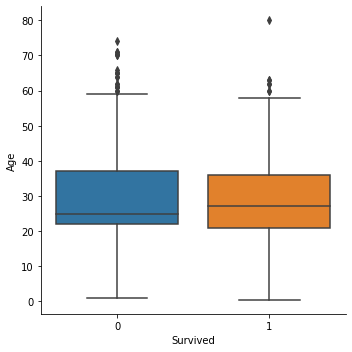

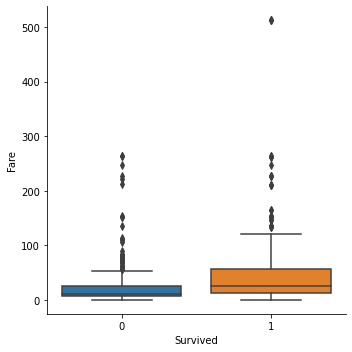

In [28]:
sns.catplot(data=training, x='Survived', y='Age', kind='box')
sns.catplot(data=training, x='Survived', y='Fare', kind='box')

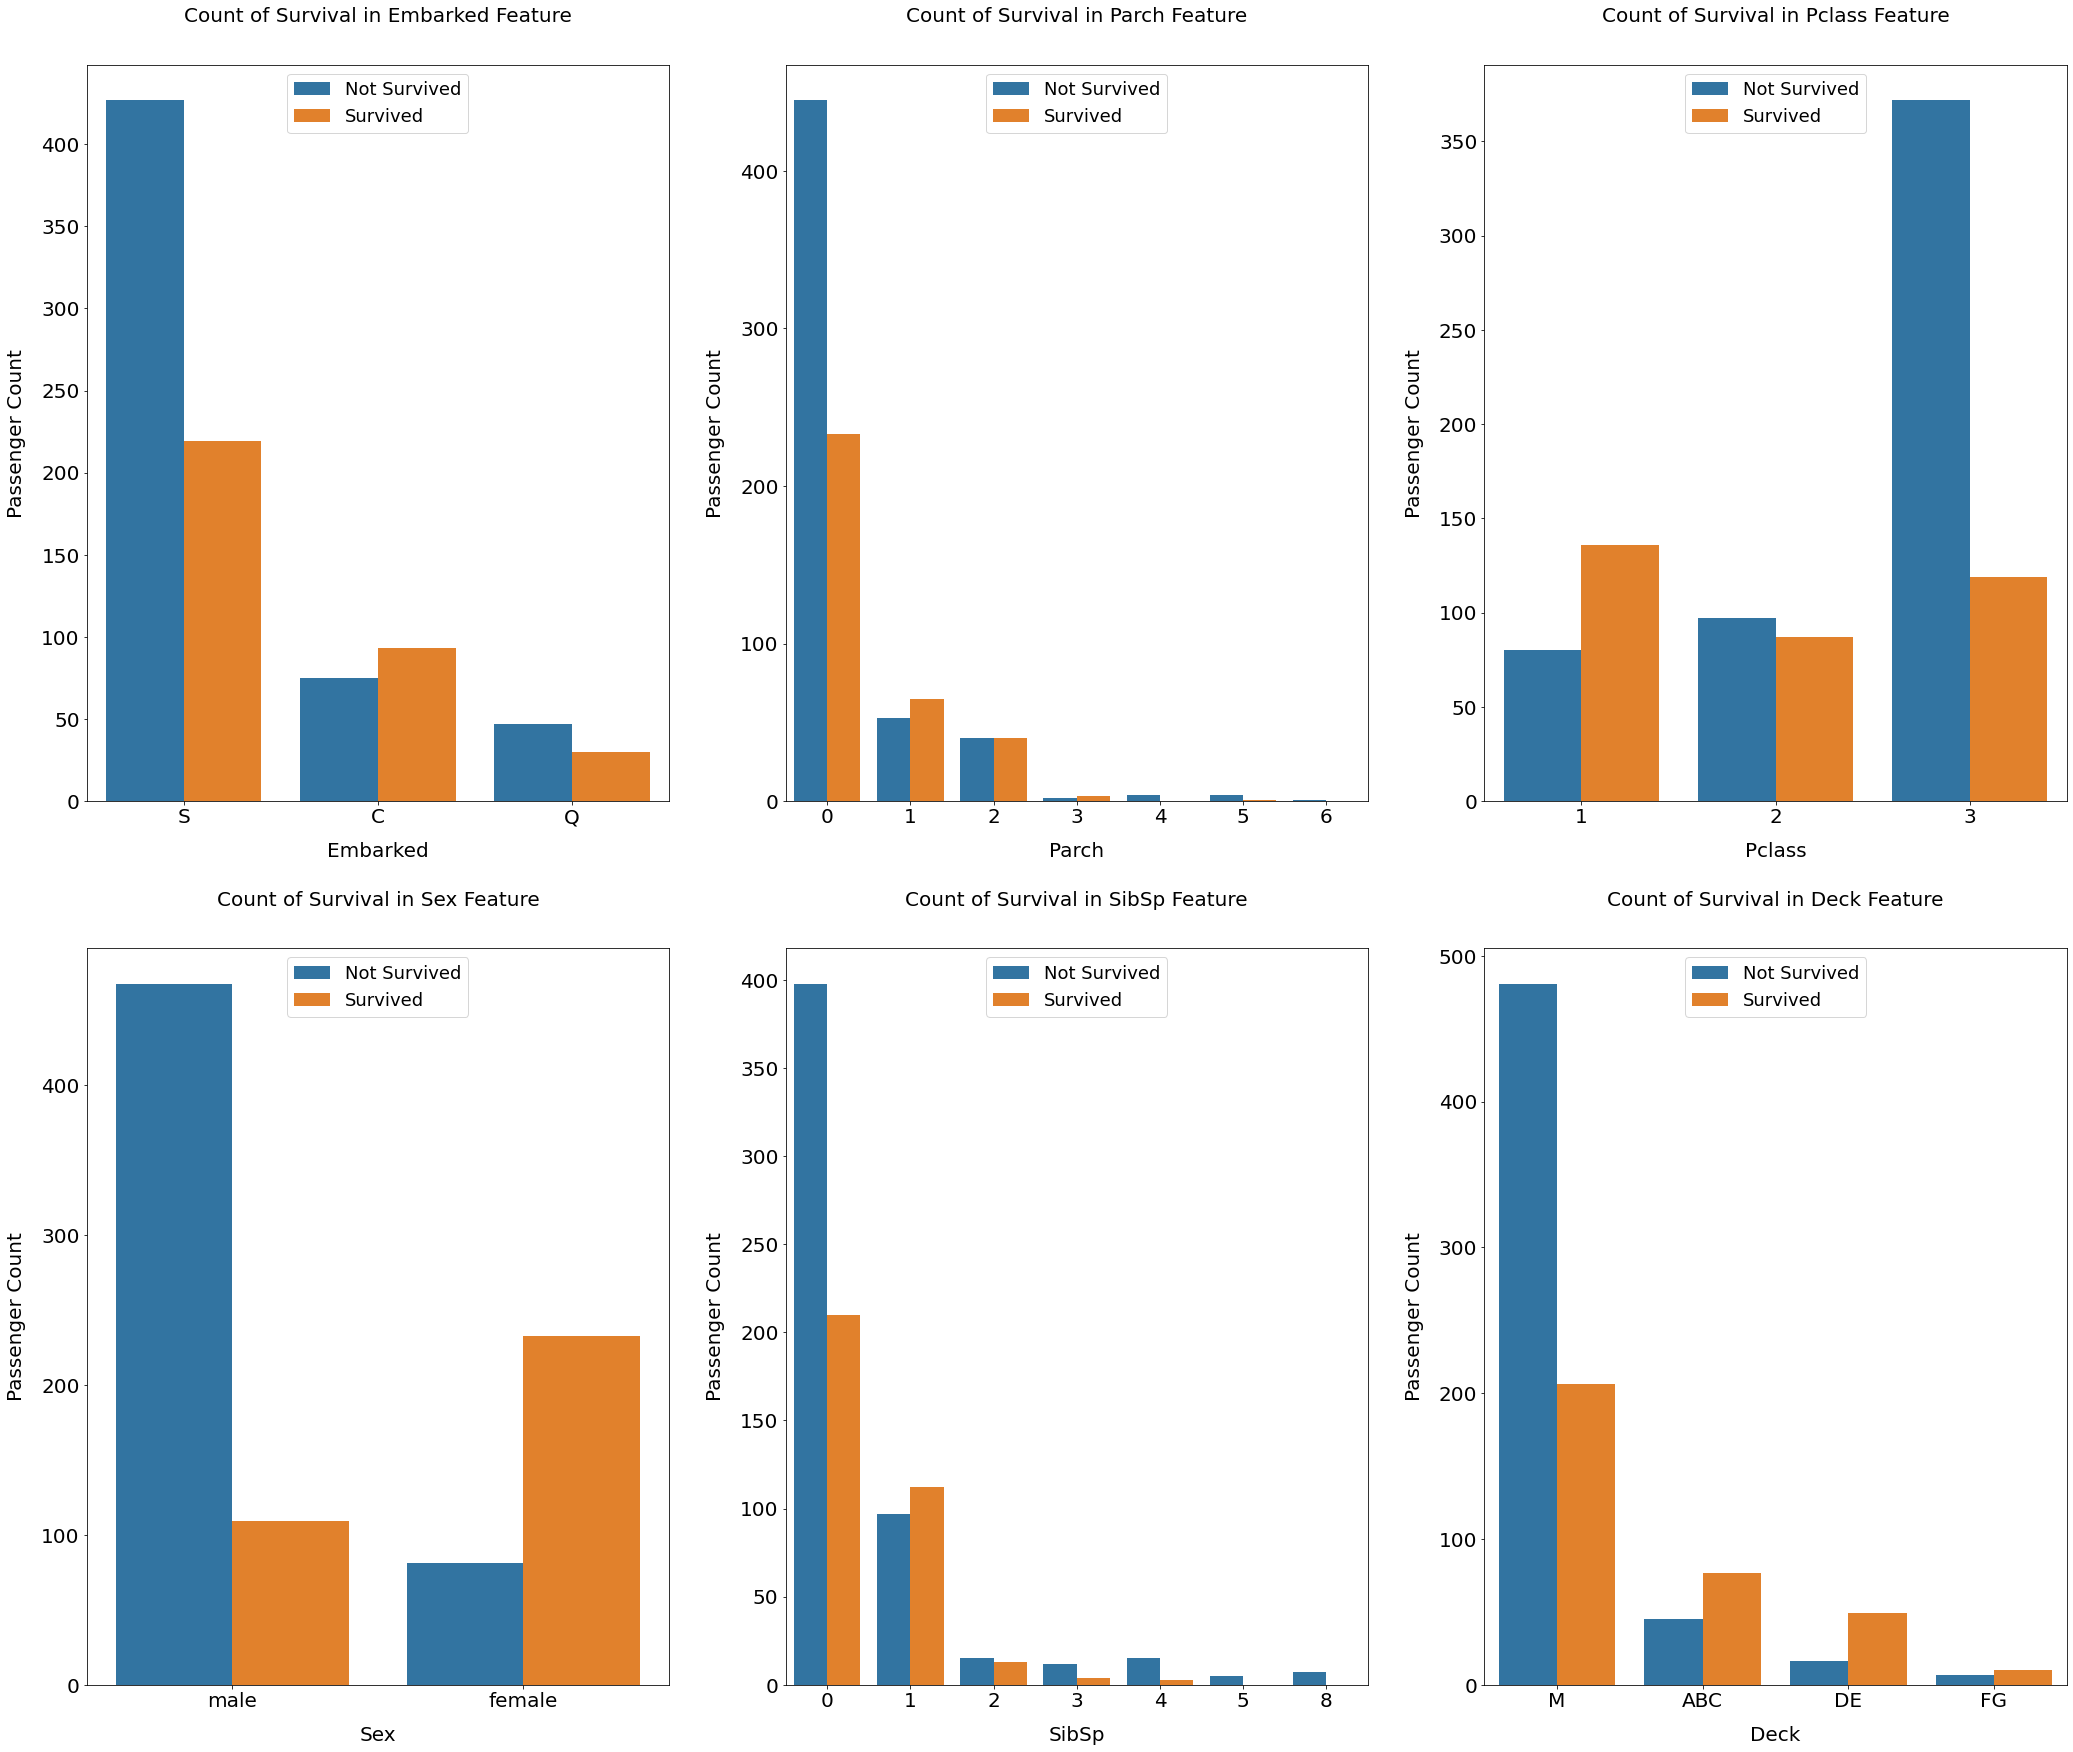

In [29]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Deck']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=training)
    
    plt.xlabel(f'{feature}', size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title(f'Count of Survival in {feature} Feature', size=20, y=1.05)

plt.show()

### Feature engineering

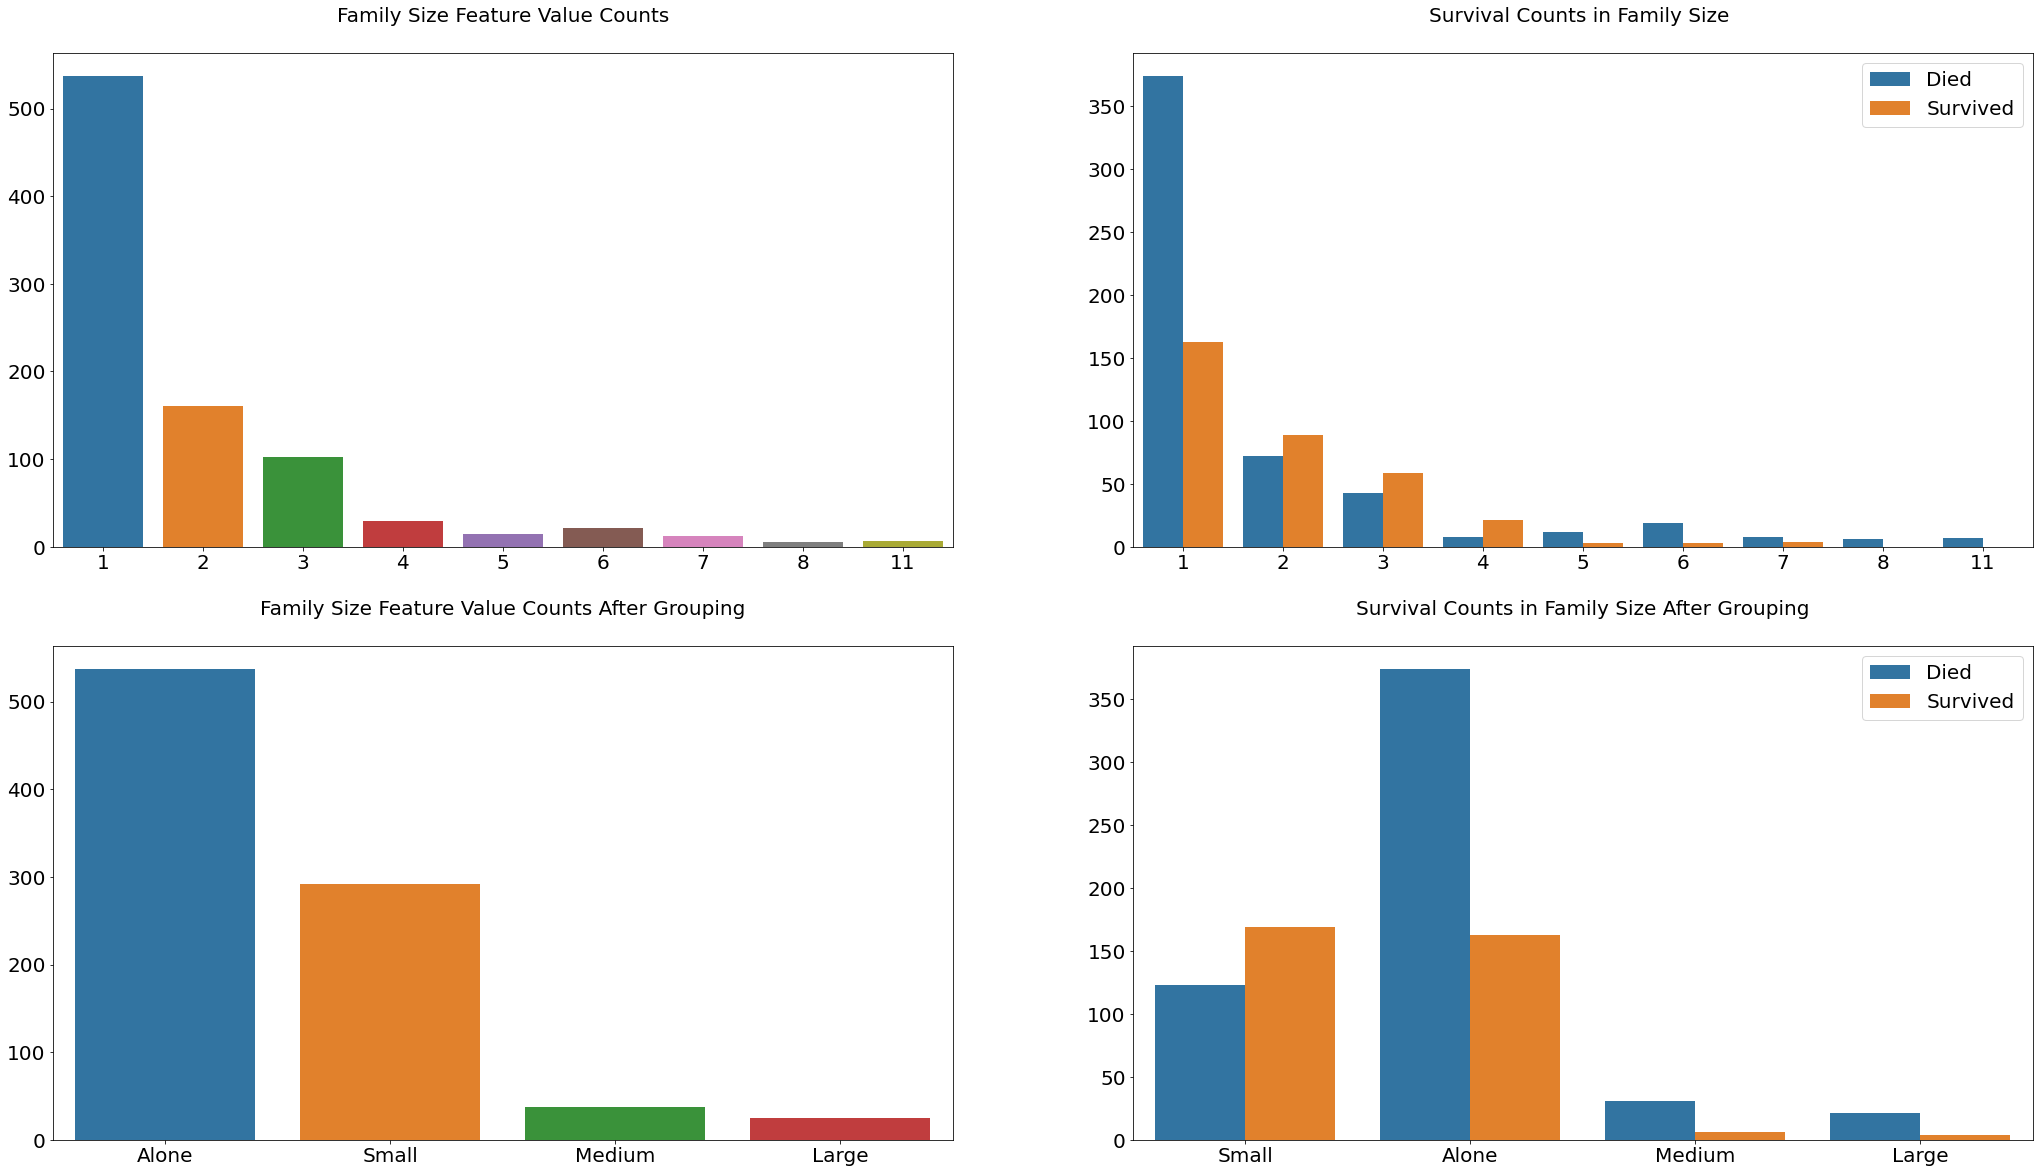

In [30]:
# Grouping families
training['Family_Size'] = training['SibSp'] + training['Parch'] + 1
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=training['Family_Size'].value_counts().index, y=training['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=training, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
training['Family_Size_Grouped'] = training['Family_Size'].map(family_map)
test['Family_Size_Grouped'] = test['Family_Size'].map(family_map)

sns.barplot(x=training['Family_Size_Grouped'].value_counts().index, y=training['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=training, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Died', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

In [31]:
# Grouping by title
training['Title'] = training['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
training['Is_Married'] = 0
training['Is_Married'].loc[training['Title'] == 'Mrs'] = 1

test['Title'] = test['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
test['Is_Married'] = 0
test['Is_Married'].loc[test['Title'] == 'Mrs'] = 1

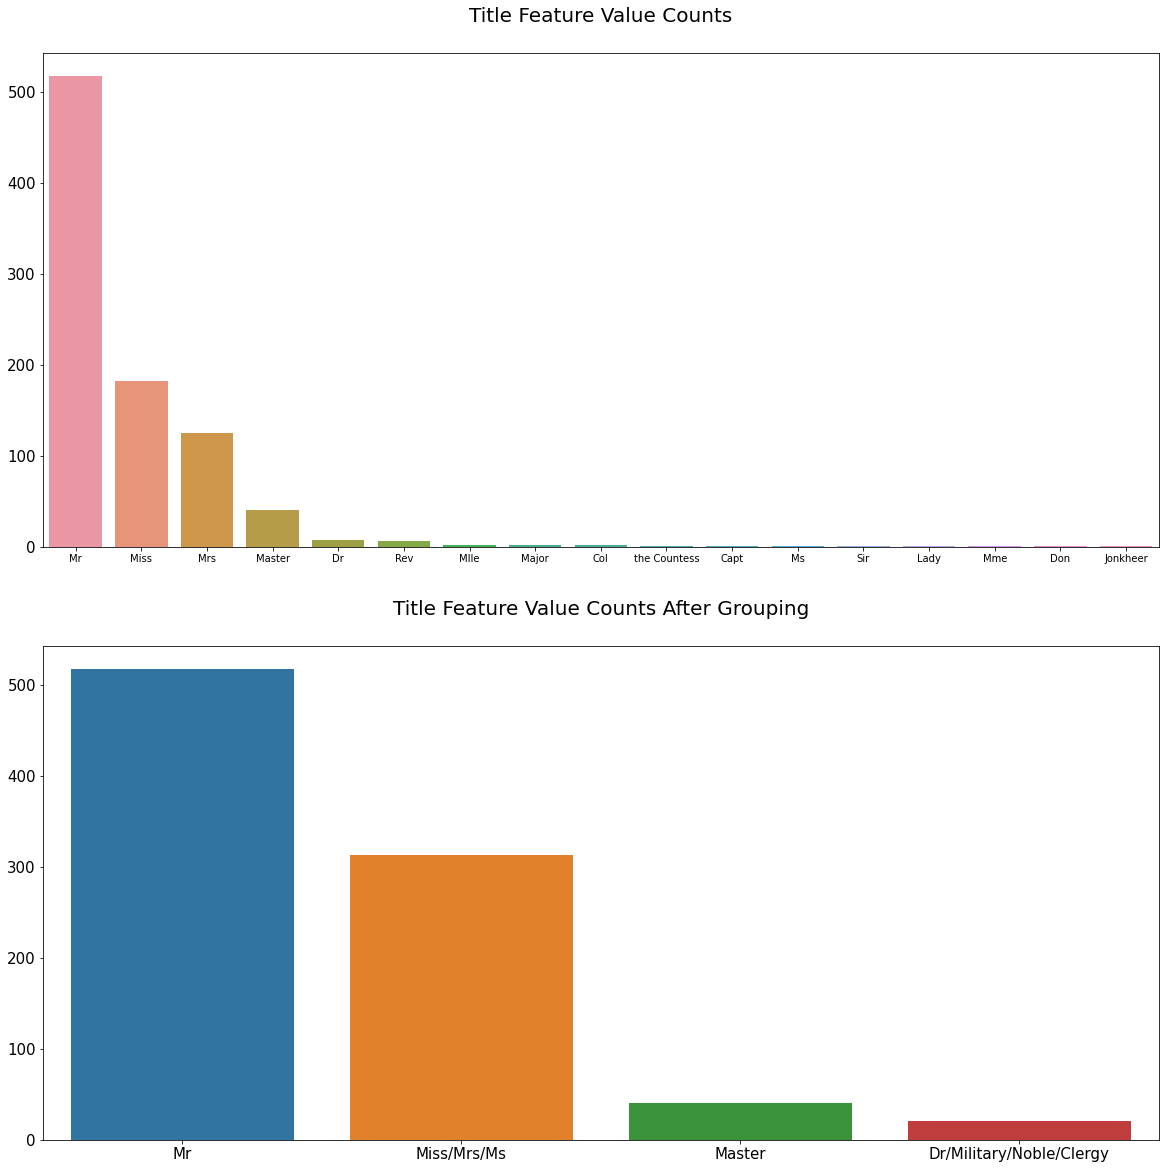

In [32]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=training['Title'].value_counts().index, y=training['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

training['Title'] = training['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
training['Title'] = training['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

test['Title'] = test['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
test['Title'] = test['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=training['Title'].value_counts().index, y=training['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

In [33]:
def extract_surname(data):    
    families = []
    
    for i in range(len(data)):        
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

training['Family'] = extract_surname(training['Name'])
test['Family'] = extract_surname(test['Name'])

### Data preprocessing

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

X = training.copy()
y = X.pop('Survived')

X_test = test.copy()

# Preprocessing
X_train, X_valid, y_train, y_valid, = train_test_split(
    X,
    y,
    stratify=y,
    train_size=0.8,
    random_state=123
)

features_SC = [
    'Age',
    'Fare'
    ]

features_OH = [
    'Pclass',
    'Sex',
    'Deck',
    'Embarked',
    'Title',
    'Family_Size_Grouped'
    ]


transformer_SC = make_pipeline(StandardScaler())
transformer_OH = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

preprocessor = make_column_transformer(
    (transformer_SC, features_SC),
    (transformer_OH, features_OH)
)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
X_test = preprocessor.transform(X_test)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (712, 22)
y_train shape: (712,)


### Initial model building
*Mean MCC scores from 10-fold cross validation*

| Model                          | Training MCC        | Test Accuracy |
|--------------------------------|---------------------|---------------|
| Quadratic Discriminant         | 0.199 +/- 0.228     | 77.095%         |
| Naive Bayes                    | 0.601 +/- 0.067     | 78.771%         |
| Logistic Regression            | 0.641 +/- 0.087     | 83.799%         |
| K Nearst Neighbor              | 0.593 +/- 0.094     | 79.330%         |
| Random Forest                  | 0.603 +/- 0.093     | 79.888%         |
| Support Vector Classifier      | 0.639 +/- 0.084     | 82.682%         |
| XGBoost                        | 0.616 +/- 0.084     | 82.123%         |
| AdaBoost                       | 0.641 +/- 0.076     | 81.006%         |
| LGBM                           | 0.636 +/- 0.091     | 82.682%         |
| MLP                            | 0.626 +/- 0.082     | 82.682%         |
| Voting Classifer               | 0.636 +/- 0.092     | 83.799%         |

In [35]:
# Quadratic discriminant analysis
qda = QuadraticDiscriminantAnalysis()

cv = cross_val_score(
    qda,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring=make_scorer(matthews_corrcoef)
    )

qda.fit(X_train, y_train)
test_score = qda.score(X_valid, y_valid)

print(f'Mean MCC: {np.mean(cv):.3f}' f' +/- {np.std(cv):.3f}')
print(f'Test Accuracy: {test_score*100:.3f}')

Mean MCC: 0.199 +/- 0.228
Test Accuracy: 77.095


In [36]:
# Naive Bayes
gnb = GaussianNB()

cv = cross_val_score(
    gnb,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring=make_scorer(matthews_corrcoef)
    )

gnb.fit(X_train, y_train)
test_score = gnb.score(X_valid, y_valid)

print(f'Mean MCC: {np.mean(cv):.3f}' f' +/- {np.std(cv):.3f}')
print(f'Test Accuracy: {test_score*100:.3f}')

Mean MCC: 0.601 +/- 0.067
Test Accuracy: 78.771


In [37]:
# Logistic regression
lr = LogisticRegression()

cv = cross_val_score(
    lr,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring=make_scorer(matthews_corrcoef)
    )

lr.fit(X_train, y_train)
test_score = lr.score(X_valid, y_valid)

print(f'Mean MCC: {np.mean(cv):.3f}' f' +/- {np.std(cv):.3f}')
print(f'Test Accuracy: {test_score*100:.3f}')

Mean MCC: 0.641 +/- 0.087
Test Accuracy: 83.799


In [38]:
# KNN
knn = KNeighborsClassifier()

cv = cross_val_score(
    knn,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring=make_scorer(matthews_corrcoef)
    )

knn.fit(X_train, y_train)
test_score = knn.score(X_valid, y_valid)

print(f'Mean MCC: {np.mean(cv):.3f}' f' +/- {np.std(cv):.3f}')
print(f'Test Accuracy: {test_score*100:.3f}')

Mean MCC: 0.593 +/- 0.094
Test Accuracy: 79.330


In [39]:
# Random forest
rf = RandomForestClassifier(random_state=1)

cv = cross_val_score(
    rf,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring=make_scorer(matthews_corrcoef)
    )

rf.fit(X_train, y_train)
test_score = rf.score(X_valid, y_valid)

print(f'Mean MCC: {np.mean(cv):.3f}' f' +/- {np.std(cv):.3f}')
print(f'Test Accuracy: {test_score*100:.3f}')

Mean MCC: 0.603 +/- 0.093
Test Accuracy: 79.888


In [40]:
# SVC
svc = SVC(probability=True)

cv = cross_val_score(
    svc,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring=make_scorer(matthews_corrcoef)
    )

svc.fit(X_train, y_train)
test_score = svc.score(X_valid, y_valid)

print(f'Mean MCC: {np.mean(cv):.3f}' f' +/- {np.std(cv):.3f}')
print(f'Test Accuracy: {test_score*100:.3f}')

Mean MCC: 0.639 +/- 0.084
Test Accuracy: 82.682


In [49]:
# XGBoost
xgb = XGBClassifier(objective='binary:logistic', random_state=1)

cv = cross_val_score(
    xgb,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring=make_scorer(matthews_corrcoef)
    )

xgb.fit(X_train, y_train)
test_score = xgb.score(X_valid, y_valid)

print(f'Mean MCC: {np.mean(cv):.3f}' f' +/- {np.std(cv):.3f}')
print(f'Test Accuracy: {test_score*100:.3f}')

[18:49:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mean MCC: 0.616 +/- 0.084
Test Accuracy: 82.123


In [42]:
# AdaBoost
ada = AdaBoostClassifier(random_state=1)

cv = cross_val_score(
    ada,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring=make_scorer(matthews_corrcoef)
    )

ada.fit(X_train, y_train)
test_score = ada.score(X_valid, y_valid)

print(f'Mean MCC: {np.mean(cv):.3f}' f' +/- {np.std(cv):.3f}')
print(f'Test Accuracy: {test_score*100:.3f}')

Mean MCC: 0.641 +/- 0.076
Test Accuracy: 81.006


In [43]:
# LightGBM
lgbm = lgb.LGBMClassifier(objective='binary', random_state=1)

cv = cross_val_score(
    lgbm,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring=make_scorer(matthews_corrcoef)
    )

lgbm.fit(X_train, y_train)
test_score = lgbm.score(X_valid, y_valid)

print(f'Mean MCC: {np.mean(cv):.3f}' f' +/- {np.std(cv):.3f}')
print(f'Test Accuracy: {test_score*100:.3f}')

Mean MCC: 0.636 +/- 0.091
Test Accuracy: 82.682


In [44]:
# Multilayer perceptron
nn = MLPClassifier(random_state=1)

cv = cross_val_score(
    nn,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring=make_scorer(matthews_corrcoef)
    )

nn.fit(X_train, y_train)
test_score = nn.score(X_valid, y_valid)

print(f'Mean MCC: {np.mean(cv):.3f}' f' +/- {np.std(cv):.3f}')
print(f'Test Accuracy: {test_score*100:.3f}')

Mean MCC: 0.626 +/- 0.082
Test Accuracy: 82.682


In [45]:
# Voting classifier
voting_clf = VotingClassifier(estimators=[
    ('qda', qda),
    ('lr', lr),
    ('knn', knn),
    ('rf', rf),
    ('gnb', gnb),
    ('svc', svc),
    ('xgb', xgb),
    ('ada', ada),
    ('lgbm', lgbm),
    ('nn', nn)
    ], 
    voting='soft')

cv = cross_val_score(
    voting_clf,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring=make_scorer(matthews_corrcoef)
    )

voting_clf.fit(X_train, y_train)
test_score = voting_clf.score(X_valid, y_valid)

print(f'Mean MCC: {np.mean(cv):.3f}' f' +/- {np.std(cv):.3f}')
print(f'Test Accuracy: {test_score*100:.3f}')

[17:23:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mean MCC: 0.636 +/- 0.092
Test Accuracy: 83.799


### Tuning hyperparameters
*Mean MCC scores from 10x5 nested cross-validation*

| Model                      | Post-Tune Training MCC       | Post-Tune Test Accuracy   |
|----------------------------|------------------------------|---------------------------|
| Logistic Regression        | 0.644 +/- 0.084              | 84.358%                   |
| K Nearst Neighbor          | 0.638 +/- 0.100              | 83.240%                   |
| Random Forest              | 0.664 +/- 0.066              | 82.123%                   |
| XGBoost                    | 0.649 +/- 0.073              | 85.475%                   |
| LGBM                       | 0.644 +/- 0.070              | 84.358%                   |
| MLP                        | 0.647 +/- 0.081              | 84.358%                   |

In [46]:
lr = LogisticRegression()

param_grid = {
    'max_iter': stats.uniform(1000, 10000),
    'penalty': ['l1', 'l2'],
    'C': stats.loguniform(0.0001, 1000.0)
    }

clf_lr = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_grid,
    cv=5,
    n_jobs=-1,
    n_iter=500,
    scoring=make_scorer(matthews_corrcoef),
    random_state=1,
    refit=True
    )

scores = cross_val_score(
    clf_lr,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring=make_scorer(matthews_corrcoef)
    )

clf_lr = clf_lr.fit(X_train, y_train)
best_lr = clf_lr.best_estimator_
best_lr.fit(X_train, y_train)
test_score = best_lr.score(X_valid, y_valid)

print(f'Mean training MCC: {np.mean(scores):.3f}' f' +/- {np.std(scores):.3f}')
print(f'Test Accuracy: {test_score*100:.3f}')

Mean training MCC: 0.644 +/- 0.084
Test Accuracy: 84.358


In [47]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
    }

clf_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring=make_scorer(matthews_corrcoef),
    refit=True
    )

scores = cross_val_score(
    clf_knn,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring=make_scorer(matthews_corrcoef)
    )

clf_knn = clf_knn.fit(X_train, y_train)
best_knn = clf_knn.best_estimator_
best_knn.fit(X_train, y_train)
test_score = best_knn.score(X_valid, y_valid)

print(f'Mean MCC: {np.mean(scores):.3f}' f' +/- {np.std(scores):.3f}')
print(f'Test Accuracy: {test_score*100:.3f}')

Mean MCC: 0.638 +/- 0.100
Test Accuracy: 83.240


In [48]:
rf = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion':['gini', 'entropy'], 
    'bootstrap': [True, False],
    'max_depth': [3, 5, 10, 20, 50, 75, 100, None],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    }

clf_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    cv=5,
    n_jobs=-1,
    n_iter=500,
    scoring=make_scorer(matthews_corrcoef),
    random_state=1,
    refit=True
    )

scores = cross_val_score(
    clf_rf,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring=make_scorer(matthews_corrcoef)
    )

clf_rf = clf_rf.fit(X_train, y_train)
best_rf = clf_rf.best_estimator_
best_rf.fit(X_train, y_train)
test_score = best_rf.score(X_valid, y_valid)

print(f'Mean MCC: {np.mean(scores):.3f}' f' +/- {np.std(scores):.3f}')
print(f'Test Accuracy: {test_score*100:.3f}')

Mean MCC: 0.664 +/- 0.066
Test Accuracy: 82.123


In [50]:
xgb = XGBClassifier(objective='binary:logistic', random_state=1)

param_grid = {
    'n_estimators': stats.randint(100, 1000),
    'colsample_bytree': stats.uniform(0.1, 1.0),
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': stats.uniform(0.1, 1.0),
    'reg_lambda': stats.uniform(1.0, 2.0),
    'subsample': stats.uniform(0.1, 1.0),
    'gamma': stats.loguniform(0.0001, 1000.0),
    'learning_rate':stats.loguniform(0.01, 6.0),
    'min_child_weight': stats.loguniform(0.0001, 100.0),
    'sampling_method': ['uniform', 'gradient_based']
}

clf_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    cv=5,
    n_jobs=-1,
    n_iter=500,
    scoring=make_scorer(matthews_corrcoef),
    random_state=1,
    refit=True
    )

scores = cross_val_score(
    clf_xgb,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring=make_scorer(matthews_corrcoef)
    )

clf_xgb = clf_xgb.fit(X_train, y_train)
best_xgb = clf_xgb.best_estimator_
best_xgb.fit(X_train, y_train)
test_score = best_xgb.score(X_valid, y_valid)

print(f'Mean MCC: {np.mean(scores):.3f}' f' +/- {np.std(scores):.3f}')
print(f'Test Accuracy: {test_score*100:.3f}')

[19:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mean MCC: 0.649 +/- 0.073
Test Accuracy: 85.475


In [51]:
lgbm = lgb.LGBMClassifier(objective='binary', random_state=1)

param_grid = {
    'n_estimators': stats.randint(100, 2000),
    'colsample_bytree': stats.uniform(0.1, 1.0),
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
    'subsample': stats.uniform(0.1, 1.0),
    'learning_rate':stats.loguniform(0.01, 1.0),
    'min_child_weight': stats.loguniform(0.0001, 10000.0)
}

clf_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_grid,
    cv=5,
    n_jobs=-1,
    n_iter=500,
    scoring=make_scorer(matthews_corrcoef),
    random_state=1,
    refit=True
    )

scores = cross_val_score(
    clf_lgbm,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring=make_scorer(matthews_corrcoef)
    )

clf_lgbm = clf_lgbm.fit(X_train, y_train)
best_lgbm = clf_lgbm.best_estimator_
best_lgbm.fit(X_train, y_train)
test_score = best_lgbm.score(X_valid, y_valid)

print(f'Mean MCC: {np.mean(scores):.3f}' f' +/- {np.std(scores):.3f}')
print(f'Test Accuracy: {test_score*100:.3f}')

Mean MCC: 0.644 +/- 0.070
Test Accuracy: 84.358


In [52]:
nn = MLPClassifier(random_state=1)

param_grid = {
    'hidden_layer_sizes': [
        (50, 50, 50),
        (50, 100, 50),
        (100,),
        (50, 100,),
        (50, 75, 100,)
        ],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': stats.uniform(1000, 10000)
    }
                                  
clf_nn = RandomizedSearchCV(
    estimator=nn,
    param_distributions=param_grid,
    cv=5,
    n_jobs=-1,
    n_iter=500,
    scoring=make_scorer(matthews_corrcoef),
    random_state=1,
    refit=True
    )

scores = cross_val_score(
    clf_nn,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring=make_scorer(matthews_corrcoef)
    )

clf_nn = clf_nn.fit(X_train, y_train)
best_nn = clf_nn.best_estimator_
best_nn.fit(X_train, y_train)
test_score = best_nn.score(X_valid, y_valid)

print(f'Mean MCC: {np.mean(scores):.3f}' f' +/- {np.std(scores):.3f}')
print(f'Test Accuracy: {test_score*100:.3f}')

Mean MCC: 0.647 +/- 0.081
Test Accuracy: 84.358


### Deep learning with Keras

In [ ]:
from tensorflow import keras

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=40,
    mode='min',
    restore_best_weights=True
)

model = keras.Sequential([
    keras.layers.Dense(320, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(320, activation='relu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(320, activation='relu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

In [ ]:
metrics = [
    'binary_accuracy',
    keras.metrics.AUC(name='auc'),
    keras.metrics.AUC(name='prc', curve='PR')
]

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=metrics
)

training_history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=200,
    callbacks=[early_stop]
)

In [ ]:
training_history_df = pd.DataFrame(training_history.history)

print(
    f'Best Validation Loss: {training_history_df.val_loss.min():0.4f}',
    f'\nBest Validation Accuracy: {training_history_df.val_binary_accuracy.max():0.4f}',
    f'\nBest Validation AUC: {training_history_df.val_auc.max():0.4f}',
    f'\nBest Validation PRC: {training_history_df.val_prc.max():0.4f}'
    )

training_history_df.loc[:, ['loss', 'val_loss']].plot()
training_history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()
training_history_df.loc[:, ['auc', 'val_auc']].plot()
training_history_df.loc[:, ['prc', 'val_prc']].plot()

In [ ]:
model.evaluate(
    x=X_valid,
    y=y_valid
)

*Tuning keras model*

In [ ]:
from tensorflow import keras
import keras_tuner as kt

def model_builder(hp):
  model = keras.Sequential()

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 8-512
  hp_units = hp.Int(name='units', min_value=8, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu', kernel_regularizer='l2', input_dim=X_train.shape[1]))
  for i in range(hp.Int(name='depth', min_value=2, max_value=6)):
    model.add(keras.layers.Dense(hp_units, activation='relu', kernel_regularizer='l2'))
  model.add(keras.layers.Dense(1, activation='sigmoid', kernel_regularizer='l2',))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=['binary_accuracy', keras.metrics.AUC(name='auc'), keras.metrics.AUC(name='prc', curve='PR')]
      )

  return model

tuner = kt.Hyperband(
    model_builder,
    objective=kt.Objective('val_loss', direction='min'),
    max_epochs=200,
    factor=3,
    project_name='titanic',
    directory=r'C:\Users\chris\Desktop\titanic\kt'
    )

In [ ]:
stop_early = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=40,
    min_delta=0.001,
    restore_best_weights=True
    )

In [ ]:
tuner.search(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    epochs=200,
    callbacks=[stop_early]
    )

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete.\n
Optimal number of units in the first densely-connected layer: {best_hps.get('units')}
Optimal network depth: {best_hps.get('depth')}
Optimal learning rate: {best_hps.get('learning_rate')}
""")

In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    epochs=200)

In [ ]:
history_df = pd.DataFrame(history.history)

print(
    f'Best Validation Loss: {history_df.val_loss.min():0.4f}',
    f'\nBest Validation Accuracy: {history_df.val_binary_accuracy.max():0.4f}',
    f'\nBest Validation AUC: {history_df.val_auc.max():0.4f}',
    f'\nBest Validation PRC: {history_df.val_prc.max():0.4f}'
    )

history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()
history_df.loc[:, ['auc', 'val_auc']].plot()
history_df.loc[:, ['prc', 'val_prc']].plot()

In [ ]:
model.evaluate(X_valid, y_valid)

In [ ]:
model.summary()

*Building keras model after upsampling to even out class distribution*

In [ ]:
from sklearn.utils import resample

print('# of class 0 before:', X_train[y_train == 0].shape[0])
print('# of class 1 before:', X_train[y_train == 1].shape[0])

X_up, y_up = resample(
    X_train[y_train == 1],
    y_train[y_train == 1],
    replace=True,
    n_samples=X_train[y_train == 0].shape[0],
    random_state=123
)

X_bal = np.vstack((X_train[y_train == 0], X_up))
y_bal = np.hstack((y_train[y_train == 0], y_up))

print('# of class 0 before:', X_bal[y_bal == 0].shape[0])
print('# of class 1 before:', X_bal[y_bal == 1].shape[0])

In [ ]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=40,
    mode='min',
    restore_best_weights=True
)

bal_model = keras.Sequential([
    keras.layers.Dense(320, activation='relu', input_dim=X_bal.shape[1]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(320, activation='relu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(320, activation='relu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])

bal_model.summary()

In [ ]:
metrics = [
    'accuracy',
    keras.metrics.AUC(name='auc'),
    keras.metrics.AUC(name='prc', curve='PR')
]

bal_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=metrics
)

bal_training_history = bal_model.fit(
    X_bal,
    y_bal,
    validation_split=0.2,
    batch_size=256,
    epochs=200,
    callbacks=[early_stop]
)

In [ ]:
bal_training_history_df = pd.DataFrame(bal_training_history.history)

bal_training_history_df.loc[:, ['loss', 'val_loss']].plot()
bal_training_history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
bal_training_history_df.loc[:, ['auc', 'val_auc']].plot()
bal_training_history_df.loc[:, ['prc', 'val_prc']].plot()

### Ensemble Approaches
- Hard voting of all estimators (LR, KNN, RF, XGB, LGBM, MLP) (0.651 +/- 0.078; 86.592%)
- Soft voting of all estimators (LR, KNN, RF, XGB, LGBM, MLP) (0.653 +/- 0.072; 84.916%)

In [54]:
# Constructing voting classifiers using best hyperparameters from prior section
voting_clf_hard = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('knn', best_knn),
        ('rf', best_rf),
        ('xgb', best_xgb),
        ('lgbm', best_lgbm),
        ('nn', best_nn)
    ],
    voting ='hard'
    )

voting_clf_soft = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('knn', best_knn),
        ('rf', best_rf),
        ('xgb', best_xgb),
        ('lgbm', best_lgbm),
        ('nn', best_nn)
    ],
    voting ='soft'
    )

cv_clf_hard = cross_val_score(
    voting_clf_hard,
    X_train,
    y_train,
    cv=10,
    scoring=make_scorer(matthews_corrcoef)
    )

cv_clf_soft = cross_val_score(
    voting_clf_soft,
    X_train,
    y_train,
    cv=10,
    scoring=make_scorer(matthews_corrcoef)
    )

voting_clf_hard = voting_clf_hard.fit(X_train, y_train)
best_hard_voting = voting_clf_hard
best_hard_voting.fit(X_train, y_train)
test_score = best_hard_voting.score(X_valid, y_valid)

print(f'Mean hard MCC score: {cv_clf_hard.mean():.3f} \u00B1 {cv_clf_hard.std():.3f}')
print(f'Hard Test Accuracy: {test_score*100:.3f}')

voting_clf_soft = voting_clf_soft.fit(X_train, y_train)
best_soft_voting = voting_clf_soft
best_soft_voting.fit(X_train, y_train)
test_score = best_soft_voting.score(X_valid, y_valid)

print(f'Mean soft MCC score: {cv_clf_soft.mean():.3f} \u00B1 {cv_clf_soft.std():.3f}')
print(f'Soft Test Accuracy: {test_score*100:.3f}')

[08:30:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Making predictions

In [55]:
#Make Predictions using top models from each section
y_hat_svc = best_soft_voting.predict(X_test).astype(int)
y_hat_hvc = best_hard_voting.predict(X_test).astype(int)
y_hat_lr = best_lr.predict(X_test).astype(int)
y_hat_knn = best_knn.predict(X_test).astype(int)
y_hat_rf = best_rf.predict(X_test).astype(int)
y_hat_xgb = best_xgb.predict(X_test).astype(int)
y_hat_lgbm = best_lgbm.predict(X_test).astype(int)
y_hat_nn = best_nn.predict(X_test).astype(int)

In [ ]:
y_hat_km = model.predict(X_test)
y_hat_km = np.where(y_hat_km > 0.5, 1, 0)

In [ ]:
y_hat_hkm = model.predict(X_test)
y_hat_hkm = np.where(y_hat_hkm > 0.5, 1, 0)

In [56]:
final_data_1 = {'PassengerId': test.PassengerId, 'Survived': y_hat_svc}
submission_1 = pd.DataFrame(data=final_data_1)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': y_hat_hvc}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test.PassengerId, 'Survived': y_hat_lr}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test.PassengerId, 'Survived': y_hat_knn}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': test.PassengerId, 'Survived': y_hat_rf}
submission_5 = pd.DataFrame(data=final_data_5)

final_data_6 = {'PassengerId': test.PassengerId, 'Survived': y_hat_xgb}
submission_6 = pd.DataFrame(data=final_data_6)

final_data_7 = {'PassengerId': test.PassengerId, 'Survived': y_hat_lgbm}
submission_7 = pd.DataFrame(data=final_data_7)

final_data_8 = {'PassengerId': test.PassengerId, 'Survived': y_hat_nn}
submission_8 = pd.DataFrame(data=final_data_8)

final_data_comp = {
    'PassengerId': test.PassengerId,
    'Survived_vc_soft': y_hat_svc,
    'Survived_vc_hard': y_hat_hvc,
    'Survived_lr': y_hat_lr,
    'Survived_knn': y_hat_knn,
    'Survived_rf': y_hat_rf,
    'Survived_xgb': y_hat_xgb,
    'Survived_lgbm': y_hat_lgbm,
    'Survived_nn': y_hat_nn
    }

comparison = pd.DataFrame(data=final_data_comp)

In [ ]:
final_data_km = {'PassengerId': test.PassengerId, 'Survived': y_hat_km[:, 0]}
submission_km = pd.DataFrame(data=final_data_km)

In [ ]:
final_data_hkm = {'PassengerId': test.PassengerId, 'Survived': y_hat_hkm[:, 0]}
submission_hkm = pd.DataFrame(data=final_data_hkm)

In [57]:
submission_1.to_csv(r'C:\Users\chris\Desktop\titanic\predictions\submission_vc_soft.csv', index =False) # 78.708%
submission_2.to_csv(r'C:\Users\chris\Desktop\titanic\predictions\submission_vc_hard.csv', index =False) # 79.186%
submission_3.to_csv(r'C:\Users\chris\Desktop\titanic\predictions\submission_lr.csv', index=False) # 75.119%
submission_4.to_csv(r'C:\Users\chris\Desktop\titanic\predictions\submission_knn.csv', index=False) # 77.990%
submission_5.to_csv(r'C:\Users\chris\Desktop\titanic\predictions\submission_rf.csv', index=False) # 77.272%
submission_6.to_csv(r'C:\Users\chris\Desktop\titanic\predictions\submission_xgb.csv', index=False) # 78.229%
submission_7.to_csv(r'C:\Users\chris\Desktop\titanic\predictions\submission_lgbm.csv', index=False) # 78.708%
submission_8.to_csv(r'C:\Users\chris\Desktop\titanic\predictions\submission_mlp.csv', index=False) # 75.119%

comparison.to_csv(r'C:\Users\chris\Desktop\titanic\predictions\submission_comp.csv', index=False)

In [ ]:
submission_km.to_csv(r'C:\Users\chris\Desktop\titanic\predictions\submission_km.csv', index=False) # 76.315%

In [ ]:
submission_hkm.to_csv(r'C:\Users\chris\Desktop\titanic\predictions\submission_hkm.csv', index=False) # 78.229%